# Task 1 : Perform EDA

In [1]:
# importing libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

df = pd.read_csv('taskdata.csv')

In [3]:
# check the shape

df.shape

(4407, 17)

In [4]:
# check 1st 5 entries

df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [5]:
# get an overview

df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [6]:
# checking information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [7]:
# checking null values

df.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [8]:
# drop unnecessary cols

df.drop('user_id', axis=1, inplace=True)
df.drop('account_id',axis=1, inplace=True)

In [9]:
# again check the cols

df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


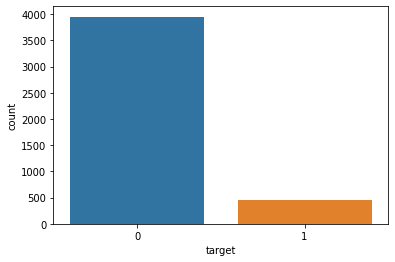

In [10]:
# visualize the target variable

g = sns.countplot(df['target'])
g.set_xticklabels(['0','1'])
plt.show()

In [11]:
# split the dataset into X and y

X = df.iloc[:, :-1]
y = df.iloc[:, 14]

In [12]:
# Checking Correlations

corr = X.corr()

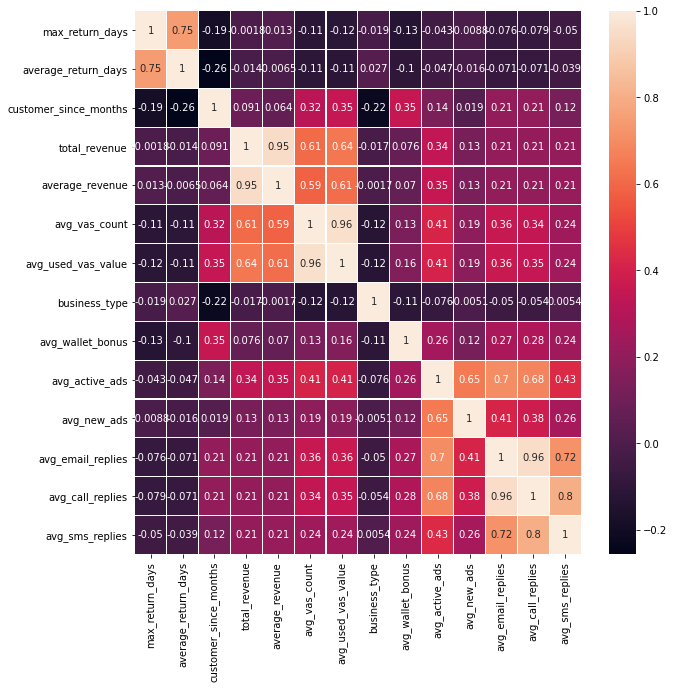

In [13]:
# plotting in a heatmap

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.05)

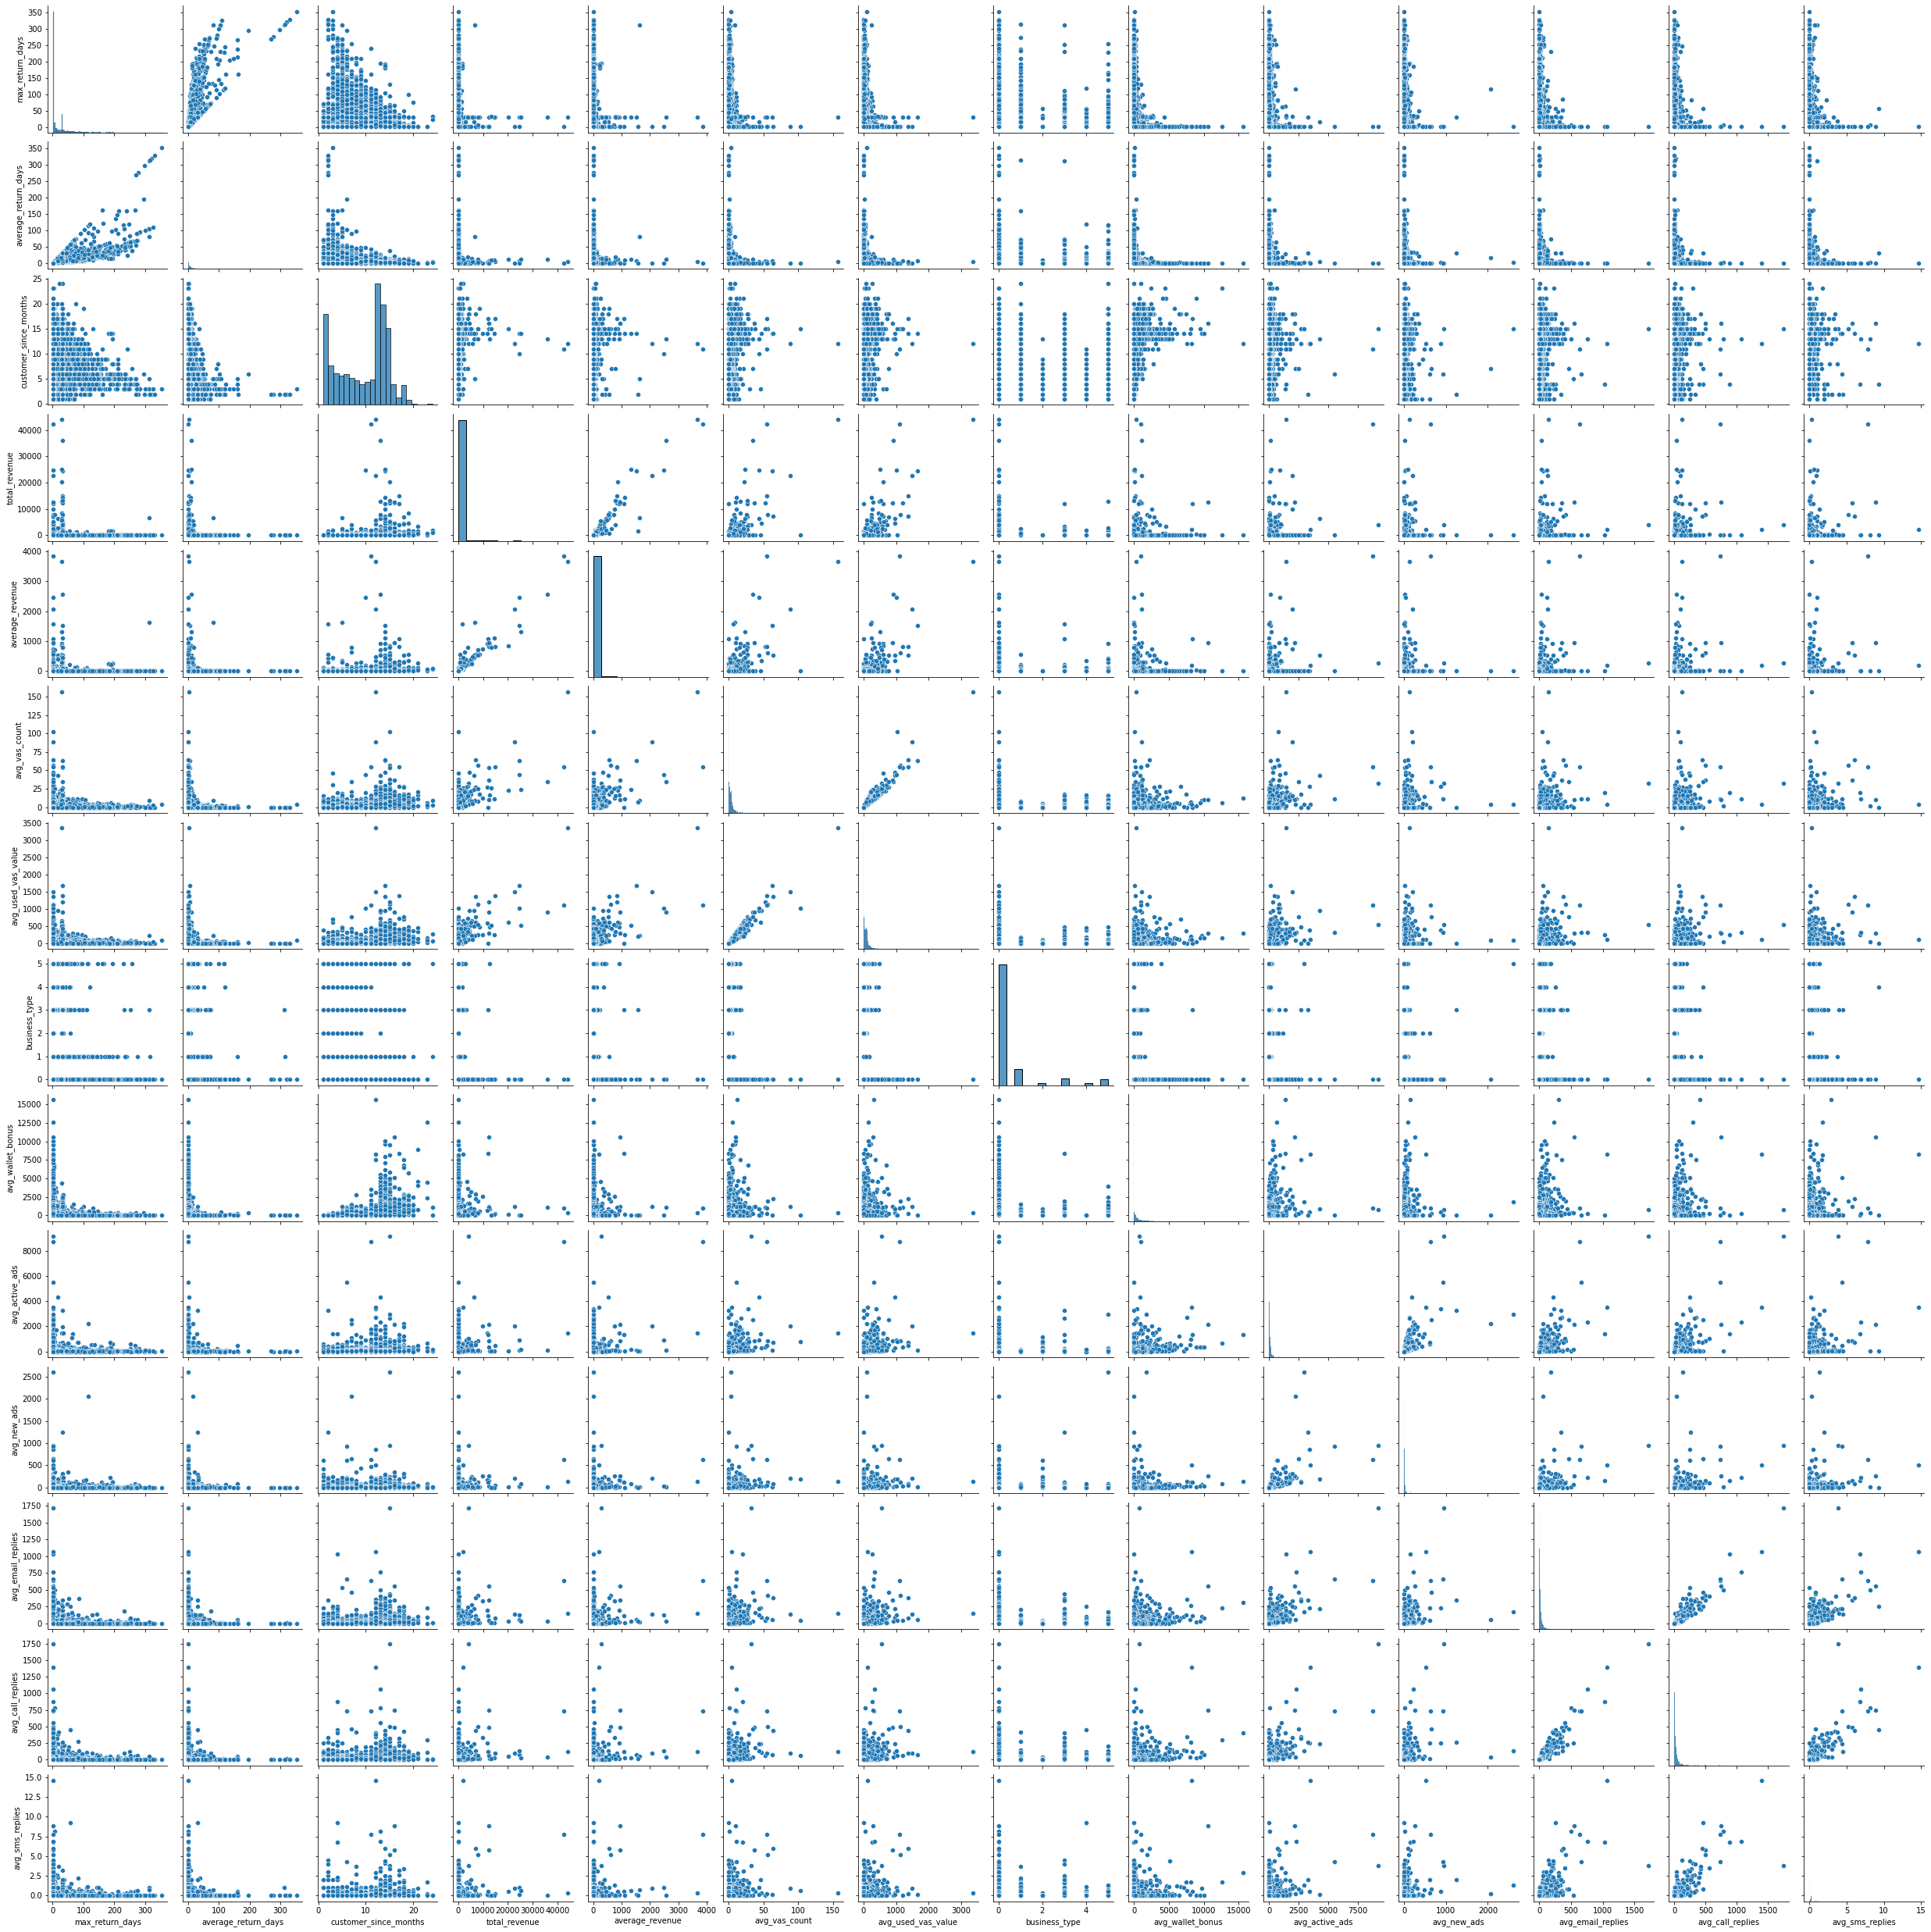

In [14]:
# checking individual relations with pairplot

sns.pairplot(X)

<Figure size 432x288 with 0 Axes>

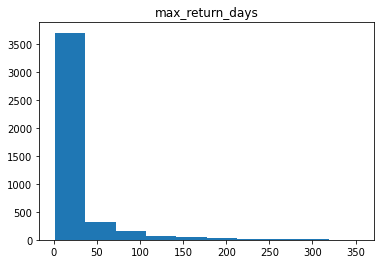

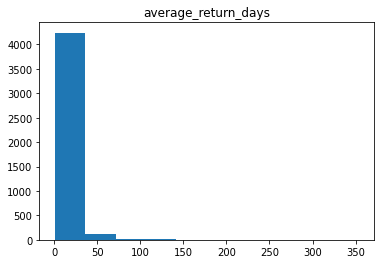

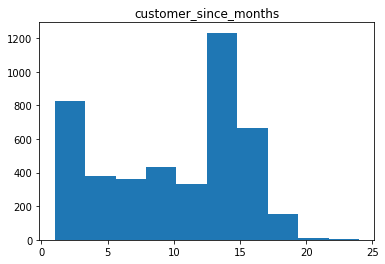

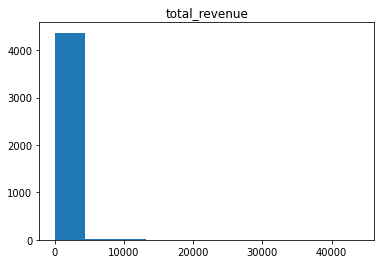

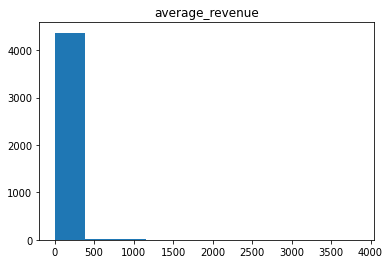

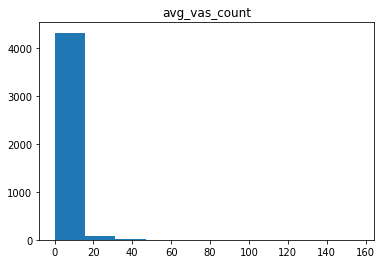

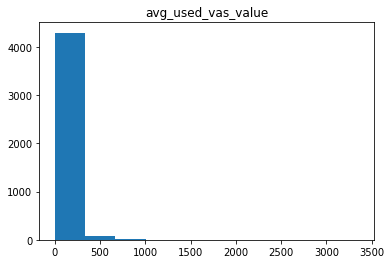

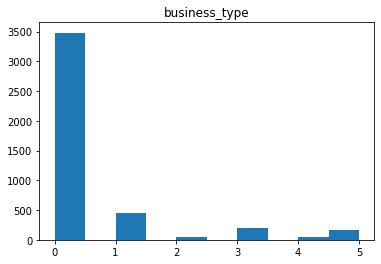

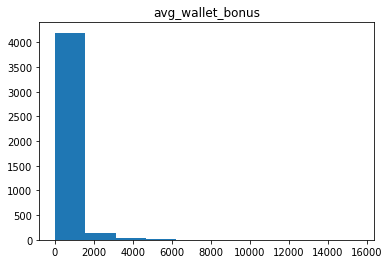

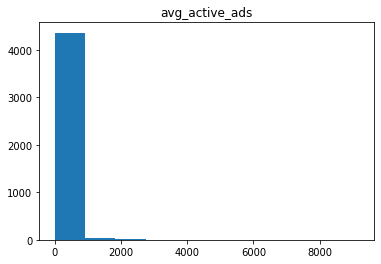

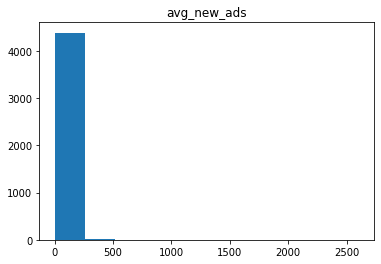

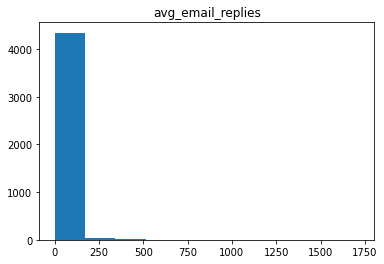

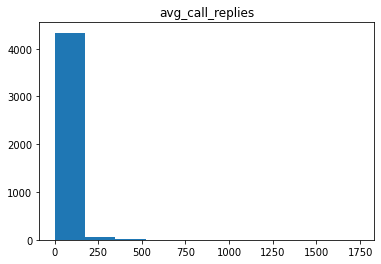

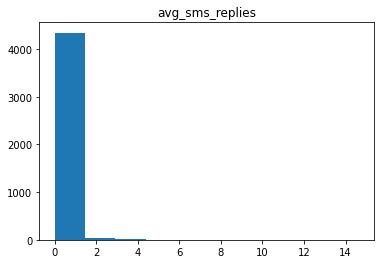

In [15]:
# checking individual distribution with histplot

for idx, column in enumerate(X.columns): 
    plt.figure(idx)
    X.hist(column=column,grid=False)

In [16]:
# drop col with less value

X.drop('total_revenue', axis=1, inplace=True)

# Task2 : Build some new features

In [17]:
# importing library

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# finding important feature

li =[]
rank = SelectKBest(chi2, k=5)
fit = rank.fit(X, y)

for i, (score, feature) in enumerate(zip(rank.scores_, X.columns)):
    li.append((score, feature))
    
df1 = pd.DataFrame(li) 
df1.sort_values(by=[0], ascending = False)

,0,1
7,53075.838893,avg_wallet_bonus
0,28348.311485,max_return_days
5,13807.374840,avg_used_vas_value
1,6225.394166,average_return_days
11,3370.135371,avg_call_replies
3,2750.353403,average_revenue
10,2626.987388,avg_email_replies
8,1902.918177,avg_active_ads
2,658.416190,customer_since_months
4,565.111904,avg_vas_count


In [19]:
# eleminating unuseful feature

X.drop(['business_type','avg_sms_replies'],axis=1,inplace=True)

In [20]:
# splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
# # scaling feature

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Task 3 : Train any classifier

In [22]:
# importing library

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Training a Neural Network

In [23]:
# importing library


import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# training a neural net

# initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
initial_learning_rate = 0.009
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.99,
    staircase=True)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 30, validation_split= 0.2)

Epoch 1/30
282/282 [==============================] - 1s 3ms/step - loss: 2.0942 - accuracy: 0.8489 - val_loss: 0.4085 - val_accuracy: 0.8993
Epoch 2/30
282/282 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8957 - val_loss: 0.2923 - val_accuracy: 0.9021
Epoch 3/30
282/282 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8965 - val_loss: 0.2958 - val_accuracy: 0.9021
Epoch 4/30
282/282 [==============================] - 1s 3ms/step - loss: 0.3092 - accuracy: 0.8986 - val_loss: 0.2943 - val_accuracy: 0.9007
Epoch 5/30
282/282 [==============================] - 1s 3ms/step - loss: 0.3091 - accuracy: 0.8975 - val_loss: 0.3710 - val_accuracy: 0.8908
Epoch 6/30
282/282 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.8954 - val_loss: 0.3180 - val_accuracy: 0.9007
Epoch 7/30
282/282 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8954 - val_loss: 0.3234 - val_accuracy: 0.9007
Epoch 

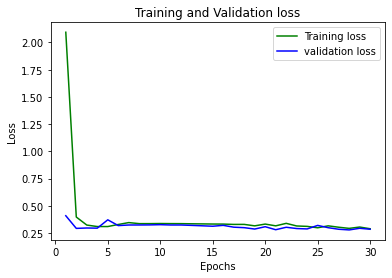

In [25]:
# plot loss

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

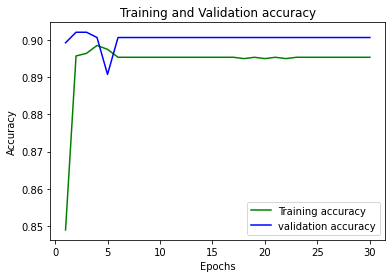

In [26]:
# plot accuracy

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
# predict on new data

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# calc acc

accuracy_score(y_test, y_pred)

0.8979591836734694

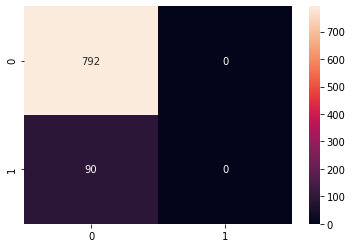

In [28]:
# plotting confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.0f')

In [29]:
# check clasification report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      1.00      0.95       792
     class 1       0.00      0.00      0.00        90

    accuracy                           0.90       882
   macro avg       0.45      0.50      0.47       882
weighted avg       0.81      0.90      0.85       882



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Handle class imblence : SMOTE with XGboost

In [30]:
# import imblearn library and resample the original data using SMOTE technique

from imblearn.over_sampling import SMOTE
import xgboost as xgb

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
# resampling dataset 

smote = SMOTE(random_state = 42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
# train with xgb 

xgb_classifier = xgb.XGBClassifier(max_depth=10, n_jobs=-1, learning_rate=0.2, n_estimators = 500)
xgb_classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
# checking accuracy

xgb_classifier.fit(X_smote, y_smote)
y_pred_test = xgb_classifier.predict(X_test.values)

accuracy_score(y_test, y_pred_test)

0.8877551020408163

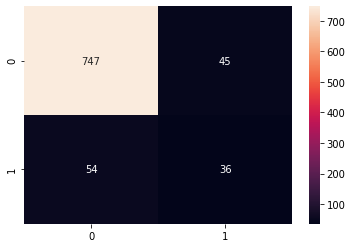

In [34]:
# predict the classes on test data using model built on SMOTE data and plot the confusion matrix

y_pred_smote = xgb_classifier.predict(X_test.values)
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='0.0f')

# Task 4 : Implement SHAP to explain decisions

In [35]:
# importing library

import shap
from sklearn.ensemble import RandomForestClassifier

In [36]:
# train a Random Forest Classifier

'''
  It was created becaue the shap has some issue with XGB classifier
  see here: `https://github.com/slundberg/shap/issues/580`
'''

rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=15, n_jobs=-1, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
# creating object for shap values

explainer = shap.TreeExplainer(rf_classifier)

In [38]:
# getting shap value for +ve and -ve outcomes

shap_val = explainer.shap_values(y)

In [39]:
# plotting feature values which leads the prediction with magnitude

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_val[1], y)

In [40]:
# explaining predictions with kernel explainer for approx. estimations

k_explainer = shap.KernelExplainer(rf_classifier.predict_proba, X_train)

Using 3525 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [41]:
# plotting feature values which leads the prediction with magnitude

shap.initjs()
shap.force_plot(k_explainer.expected_value[1], shap_val[1], y)

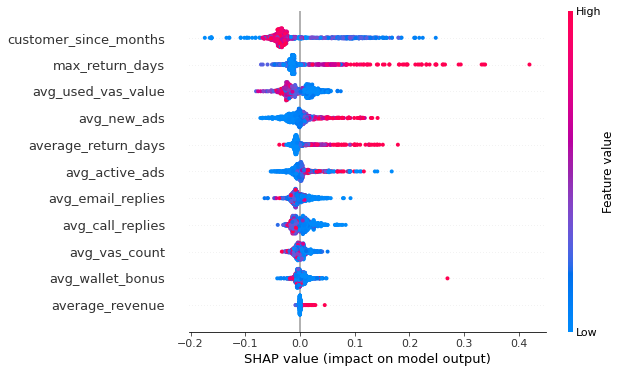

In [42]:
# checking all dependency on output

shap_val_mod = explainer.shap_values(X_test)
shap.summary_plot(shap_val_mod[1], X_test)